In [1]:
import os
import National_Snow_Model

#set path directory
os.getcwd()
os.chdir('..')
cwd = os.getcwd()

In [4]:
'''
Data Assimilation for Post-Initial conditions 
'''

#Dates
#input current and previous weeks dates (these upload csv, must match dates)
date = '06_16_2022'
prevdate = '06_09_2022'

#connect interactive script to Wasatch Snow module
Snow = National_Snow_Model.SWE_Prediction(cwd,date, prevdate)

Snow.Data_Assimilation()

100%|██████████| 1/1 [00:00<00:00, 1002.70it/s]


Fixing these bad sites in  N_Sierras :
Fixing these bad sites in  S_Sierras :
Fixing these bad sites in  Greater_Yellowstone :
Fixing these bad sites in  N_Co_Rockies :
Fixing these bad sites in  SW_Mont :
Fixing these bad sites in  SW_Co_Rockies :
Fixing these bad sites in  GBasin :
Fixing these bad sites in  N_Wasatch :
Fixing these bad sites in  N_Cascade :
Fixing these bad sites in  S_Wasatch :
Fixing these bad sites in  SW_Mtns :
Fixing these bad sites in  E_WA_N_Id_W_Mont :
Fixing these bad sites in  S_Wyoming :
Fixing these bad sites in  SE_Co_Rockies :
Fixing these bad sites in  Sawtooth :
Fixing these bad sites in  Ca_Coast :
Fixing these bad sites in  E_Or :
Fixing these bad sites in  N_Yellowstone :
Fixing these bad sites in  S_Cascade :
Fixing these bad sites in  Wa_Coast :
Fixing these bad sites in  Greater_Glacier :
Fixing these bad sites in  Or_Coast :


100%|██████████| 22/22 [00:49<00:00,  2.25s/it]


In [5]:
Snow.SWE_Predict(plot = False)

Making predictions for:  2022-06-16
N_Sierras
C:\Users\rjohnson18\Box\CIROH\NSM_App_Deployment\National-Snow-Model/Model/Prev_SWE_Models_Final/N_Sierras/N_Sierras_model.h5
S_Sierras_High
C:\Users\rjohnson18\Box\CIROH\NSM_App_Deployment\National-Snow-Model/Model/Prev_SWE_Models_Final/S_Sierras_High/S_Sierras_High_model.h5
S_Sierras_Low
C:\Users\rjohnson18\Box\CIROH\NSM_App_Deployment\National-Snow-Model/Model/Prev_SWE_Models_Final/S_Sierras_Low/S_Sierras_Low_model.h5
Greater_Yellowstone
C:\Users\rjohnson18\Box\CIROH\NSM_App_Deployment\National-Snow-Model/Model/Prev_SWE_Models_Final/Greater_Yellowstone/Greater_Yellowstone_model.h5
N_Co_Rockies
C:\Users\rjohnson18\Box\CIROH\NSM_App_Deployment\National-Snow-Model/Model/Prev_SWE_Models_Final/N_Co_Rockies/N_Co_Rockies_model.h5
SW_Mont
C:\Users\rjohnson18\Box\CIROH\NSM_App_Deployment\National-Snow-Model/Model/Prev_SWE_Models_Final/SW_Mont/SW_Mont_model.h5
SW_Co_Rockies
C:\Users\rjohnson18\Box\CIROH\NSM_App_Deployment\National-Snow-Model/Model

In [7]:
Snow.netCDF(plot = False)

File conversion to netcdf complete



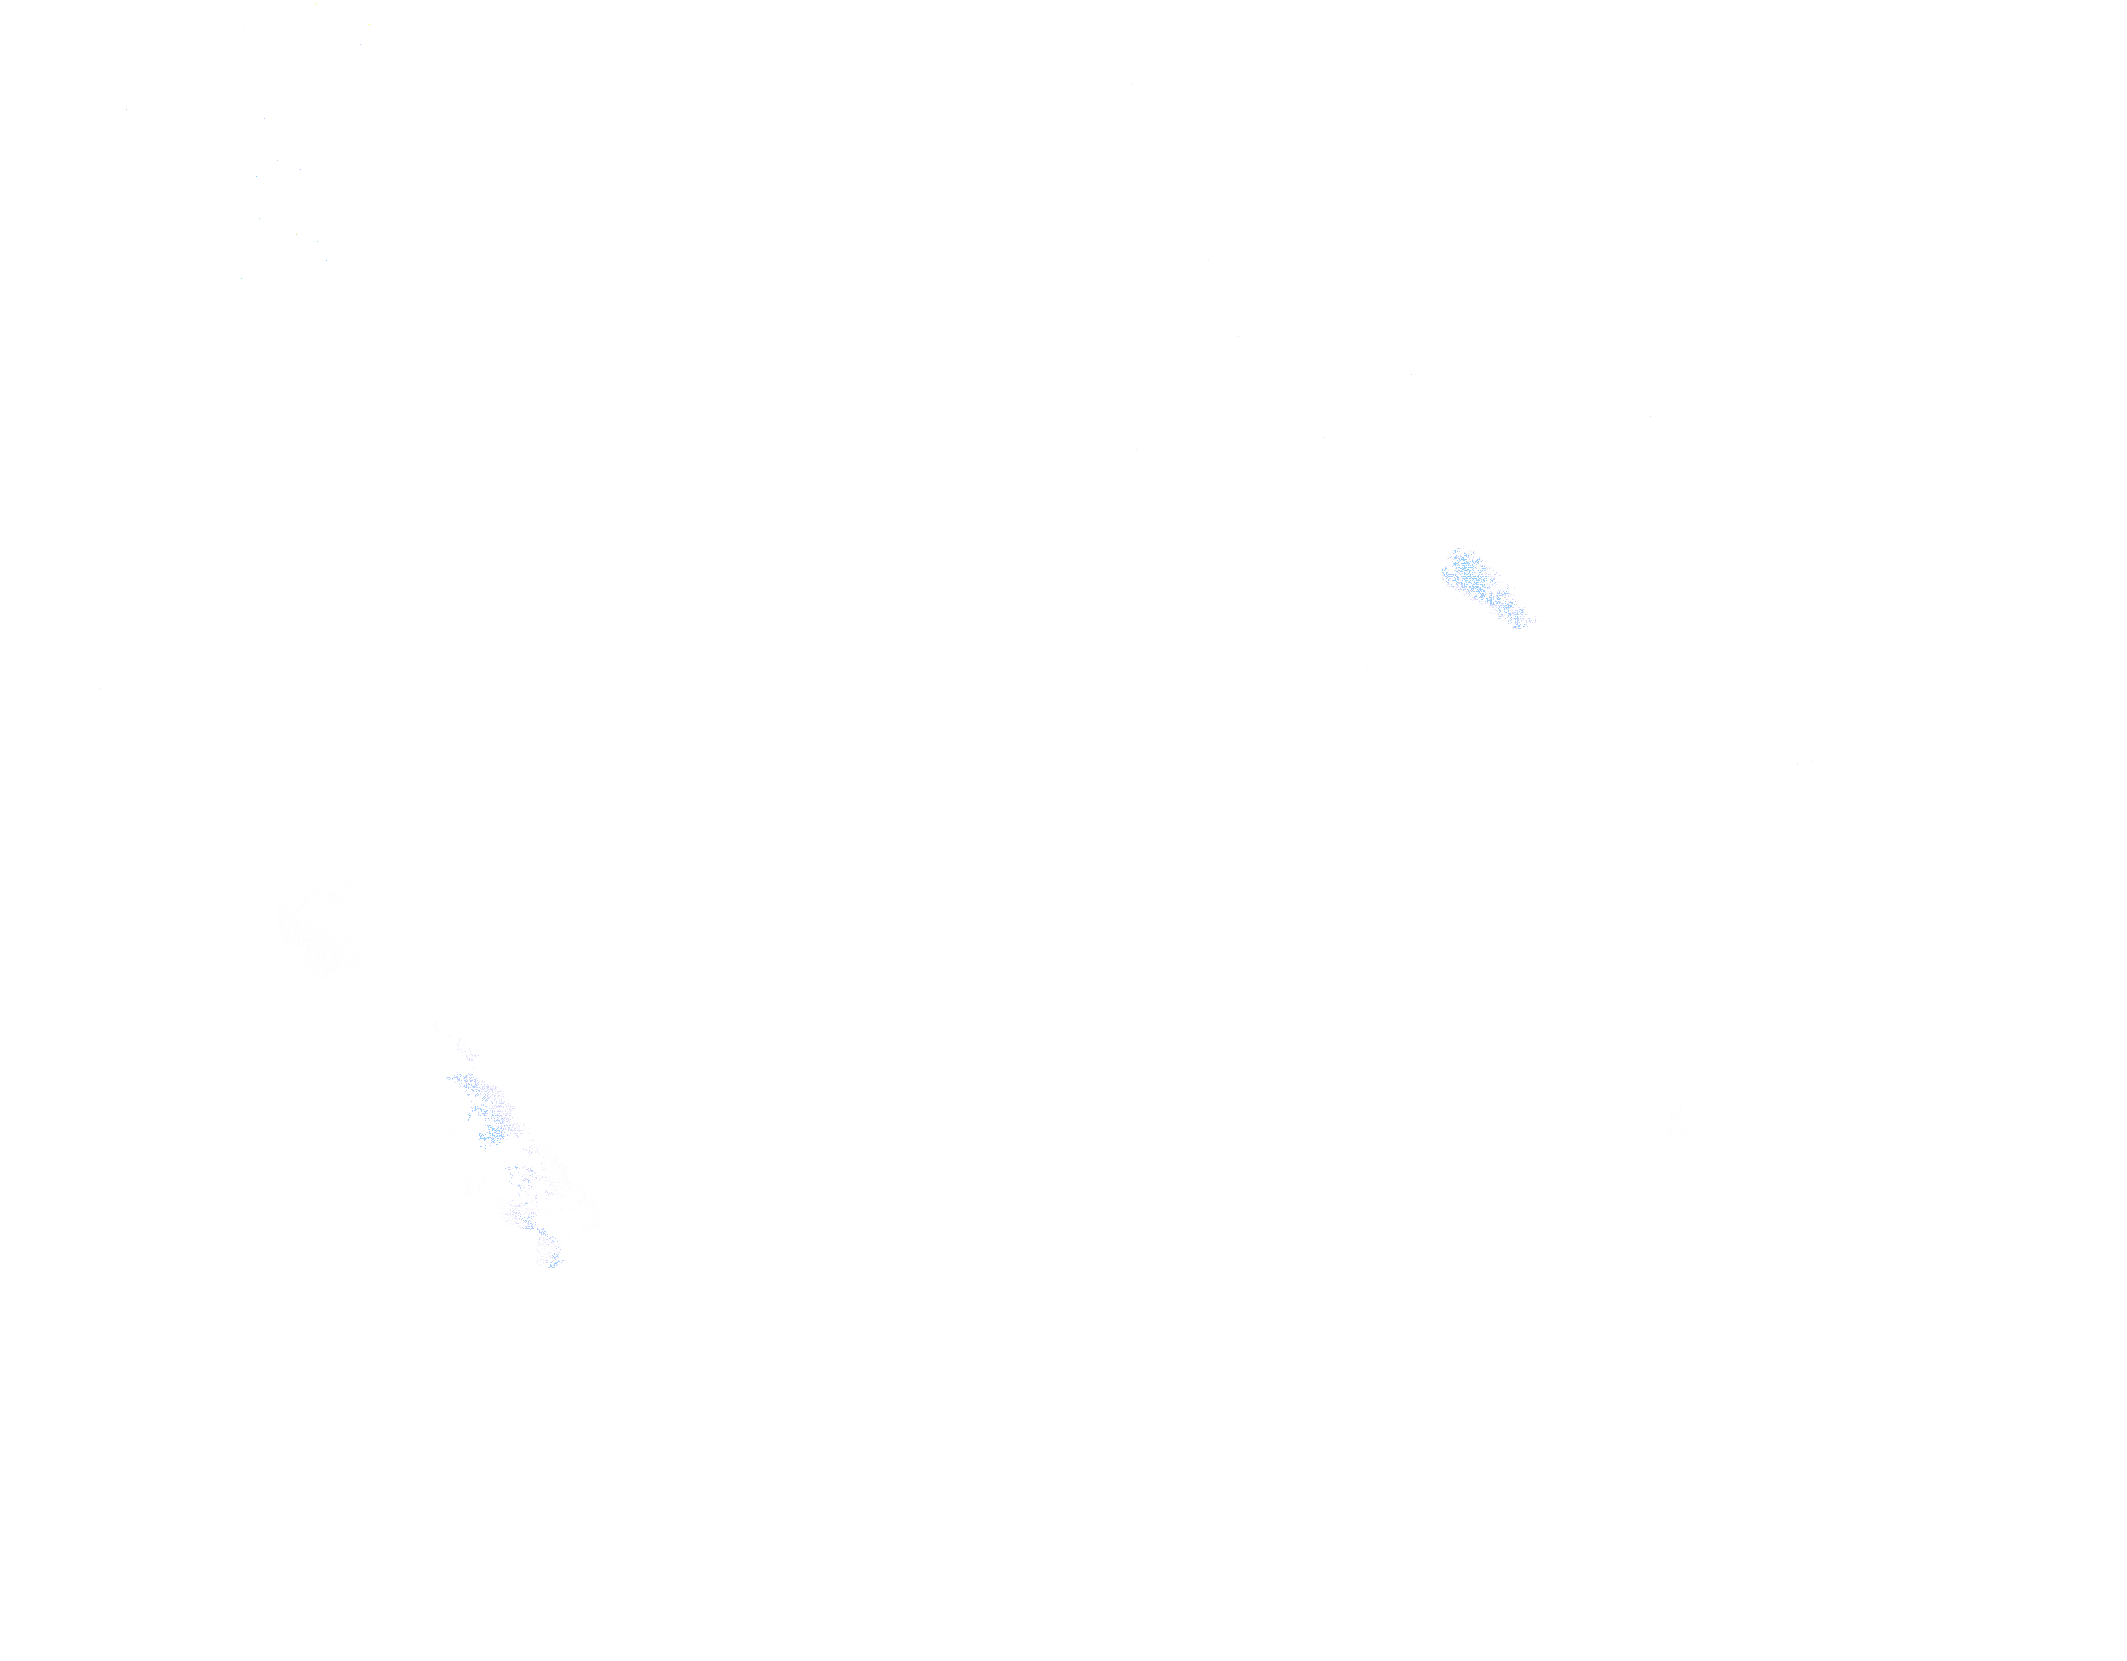

In [8]:
Snow.plot_interactive()